**<font size="5">Here is a quick guide of the template construction using BYOST**

This notebook contains the following section:
- Input data
- Construct the buildingblock
- Get template from buildingblock
- Visualization
    - Distribution of data
    - PCA results
    - GPR results
    - Template
    - Template compare with sample
    


In [1]:
import BYOST
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input data

You need a data file (the data contains features and measurements) and a condition file (the conditions that you wish the data to be modeled upon). 

- The input data file need to be a pandas dataframe that has features as columns (e.g., wavelength) and measurements as rows (e.g., flux of each spectrum at those wavelength)

- The condition file need to be a pandas dataframe that has 2 conditions (e.g, epoch and sBV) as columns and the corresonding condition of the measurements (matching by index).

In [2]:
# df_data       = pd.read_csv(<your_file_path>)
# df_conditions = pd.read_csv(<your_file_path>)

## showing a sub-sample of the two dataframe side by side
from IPython.display import display_html 
data_sample  = df_data[:10][df_data.columns[:10]].style.set_table_attributes("style='display:inline'").set_caption('Subsample of Input data (features as coloumns (this case is wavelength), measurements as rows)')
condition_sample = df_conditions[:10].style.set_table_attributes("style='display:inline'").set_caption('Subsample of the conditions to be modeled')
space = "\xa0" * 20
display_html(data_sample._repr_html_()+ space  + condition_sample._repr_html_(), raw=True)

,9342.0,9343.0,9345.0,9347.0,9348.0,9350.0,9352.0,9353.0,9355.0,9357.0
0,1.861053,1.859218,1.857147,1.854827,1.852252,1.849415,1.846315,1.842958,1.839357,1.835531
1,1.982282,1.975799,1.969107,1.962285,1.955406,1.948528,1.941697,1.934948,1.928309,1.921791
2,2.039975,2.038837,2.037787,2.036746,2.035639,2.034398,2.032961,2.031276,2.029299,2.026996
3,1.615849,1.613207,1.610346,1.607306,1.604128,1.600851,1.597516,1.594159,1.590811,1.587498
4,0.989784,0.989403,0.989054,0.988740,0.988466,0.988236,0.988055,0.987928,0.987861,0.987860
5,1.102818,1.101145,1.099526,1.097941,1.096368,1.094784,1.093166,1.091496,1.089758,1.087942
6,0.938191,0.937600,0.937132,0.936808,0.936654,0.936696,0.936961,0.937474,0.938262,0.939352
7,1.165296,1.161167,1.157174,1.153345,1.149711,1.146301,1.143144,1.140264,1.137685,1.135423
8,1.224238,1.223739,1.223524,1.223593,1.223943,1.224560,1.225428,1.226522,1.227818,1.229286
9,1.812859,1.809640,1.806386,1.803089,1.799744,1.796346,1.792893,1.789383,1.785817,1.782194


-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
# Construct the buildingblock
```python 
BYOST.build.make_buildingblock(df_data,df_conditions,
                              normalize_method='intergrated_flux', normalize_wave_range=None,standardize_std = False,
                              n_components=10,
                              length_scales=[10.0,0.1],remove_outliars = True,n_restarts_optimizer=20)
```

**Required Input:**

- `df_data`: pandas dataframe of the spectra on the common wavelenght grid, with wave as column names
- `df_conditions`: pandas dataframe of the conditions corresponding to df_data, e.g., epochs and sBVs

**Optional arguements that could be used to prepare the data**
- `normalize_method`: default = 'intergrated_flux; or None, "mean_flux" or "intergrated_flux"
            - None: take the input data as it is
            - "mean_flux": normalize by dividing the mean flux in the selected range 
            - "intergrated_flux": normalize by dividing the intergrated flux in the selected range   
- `normalize_wave_range`: default = None, which is normalized on the given data, or 2-element list ([lambda_left,lambda_right])
- `standardize_std`: default = False, if=True, standardize the input data by standard deviation of each column

**Optional arguements for the PCA step**
- `n_components`: default = 10, the number of the components you would like to keep for furhure analysis

**Optional arguements for the GPR step**
- `length_scales`: default [10, 0.1], the length scale of the RBF kernal for condition_1 and condition_2
               **The GPR depends on these initial scale values, try out the optiminal length scale 
               for your data set!! (this is a little bit similar to the smoothness of the GP preditons, 
               larger scale will return smoother precition, smaller scale will have more details)**                
- `remove_outliars`: default = True, ignore the local PC ourliars that are beyond 5sigma*global_std
- `n_restarts_optimizer`: number of restart of the optimizer

**Output**: df_buildingblocks: pandas dataframe contains resulting PCA and GPR 

In [3]:
## to build a building block (contains fitted PCA and GP) given data and conditions

## sometimes warning of Guassian Process parameters did not converge
import warnings
warnings.filterwarnings("ignore")

df_buildingblock = BYOST.build.make_buildingblock(df_data,df_conditions,normalize_method='intergrated_flux',n_components=10)

Gaussian Process:   0%|          | 0/10 [00:00<?, ?it/s]

- If you have dataset from different wavelength region, you can build them seperately and then concat them, make sure the regions are overlapped, e.g.:

```python
df_buildingblock2 = BYOST.build.make_buildingblocks(df_data2,df_conditions2,n_components=2)
df_buildingblocks = pd.concat([df_buildingblock,df_buildingblock2],axis=0,ignore_index=True)
```

- To save the df_buildingblock to pickle file for storage the fitted pca and gp, pickle file is recommended
`df_buildingblocks.to_pickle('df_buildingblocks.pkl')`

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------

# Get template from buildingblock

``` python
BYOST.template.get_template(df_buildingblock,condition1,condition2,
                            PC_select_method = ['GPR_score_threshold',0.2],
                            return_template_error=False,
                            error_MC_num = 1000,return_MC_spectra=False)
```

**Required Inputs**:
- `df_buildingblock`: pandas dataframe contains resulting PCA and GPR 
    *if there is more than 1 wavelength region (df_buildingblock.shape[0]>1), the wavelength must be aranged from 
    blue to red in the dataframe, and has overlap in neighbouring region in order to enable merging*
- `condition1`:  scaler (this parameter corresponding to the first columns of the given df_conditions for buildingblock)
- `condition2`:  scaler (this parameter corresponding to the second columns of the given df_conditions for buildingblock)

**Optional arguements**:
- `PC_select_method`: default ['GPR_score_threshold',0.2], method of selecting which PCs to keep for template flux construction
    - `GPR_score_threshold`: keep PCs that has GPR R^2 >= GPR_score_threshold
    - `PCA_variance_pctg_threshold`: keep PCs up to the one that has total_variance >= PCA_variance_pctg_threshold, eg, ['PCA_variance_pctg_threshold',94] as >=94%
    - `fixed_PC_number`: keep n (n=fixed_PC_number) first PCs, eg. ['fixed_PC_number',6] as keeping first 6 PCs

- `return_template_error`: default False; If True, return the template flux error
- `error_MC_num`: will be used is return_template_error=True, the number of the 
              interations to get the template flux error.
- `return_MC_spectra`: default False, if True, return all the possible spectra during the MC. 


**Output**: tuple
- tuple: template_wavelength, template_flux *(if `return_template_error=False`)*
- tuple: template_wavelength, template_flux, template_error *(if `return_template_error=True` and `return_MC_spectra=False`)*
- tuple: template_wavelength, template_flux, template_error, MC_template_flux *(if `return_template_error=True` and `return_MC_spectra=True`)*

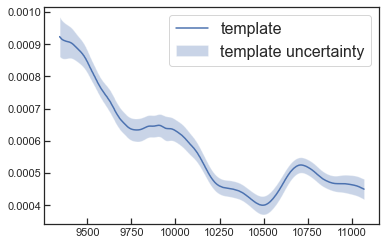

In [4]:
cond1 = -10.  # in example, cond1 is epoch of the spectrum
cond2 = 0.65  # in example, cond2 is sBV of the SN 

wave,flux,flux_err = BYOST.template.get_template(df_buildingblock,cond1,cond2,return_template_error=True)

plt.plot(wave,flux,label='template')
plt.fill_between(wave,flux-flux_err,flux+flux_err,alpha=0.3,label='template uncertainty')
plt.legend(fontsize=16)

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------

# Visualization

## Distritbuion of data
The 2 distribution of the data in the given conditions

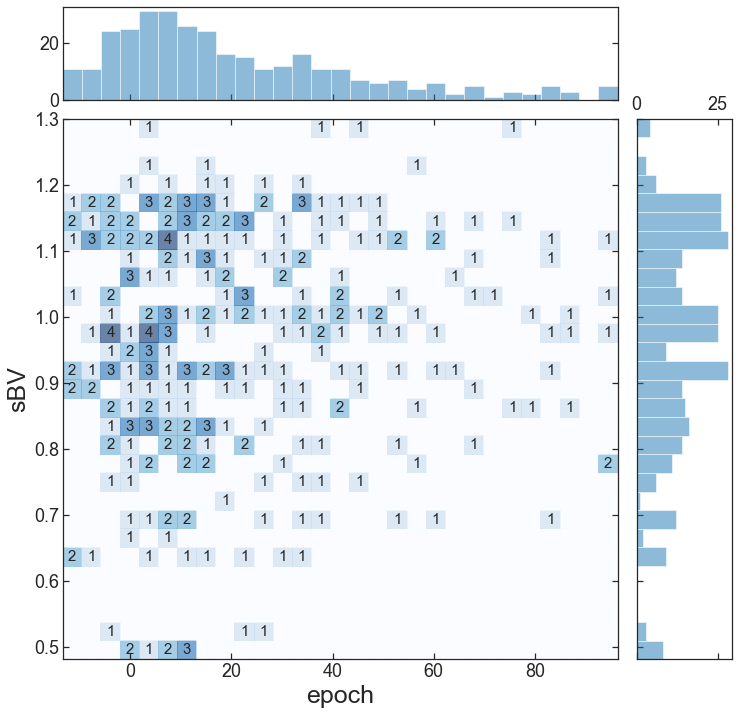

In [5]:
fig = BYOST.visualize.hist_2d(df_conditions)

-----------------------------------------------------------------------------------------------------------
## PCA results

``` python
BYOST.visualize.plot_PCA(df_buildingblock,df_conditions,n_components=None,PC_vector_sigma=1)
```

**Required Input**:
- `df_buildingblock`: pandas dataframe contains resulting PCA and GPR
- `df_conditions`: pandas dataframe of the conditions corresponding to df_spectra, e.g., epochs and sBVs

**Optional Inputs**:
- `n_components`: number of PCs to plot, default None and will plot all produced PCs
- `PC_vector_sigma`: default 2, the PC projection sigma when plotting the variance represented by the PC vectors

**Output**: Fig of PCA results:
- first row is PC vectors and its variation,
- second row is PC projections vs given conditions

Wavelength regions:   0%|          | 0/1 [00:00<?, ?it/s]

PCs:   0%|          | 0/5 [00:00<?, ?it/s]

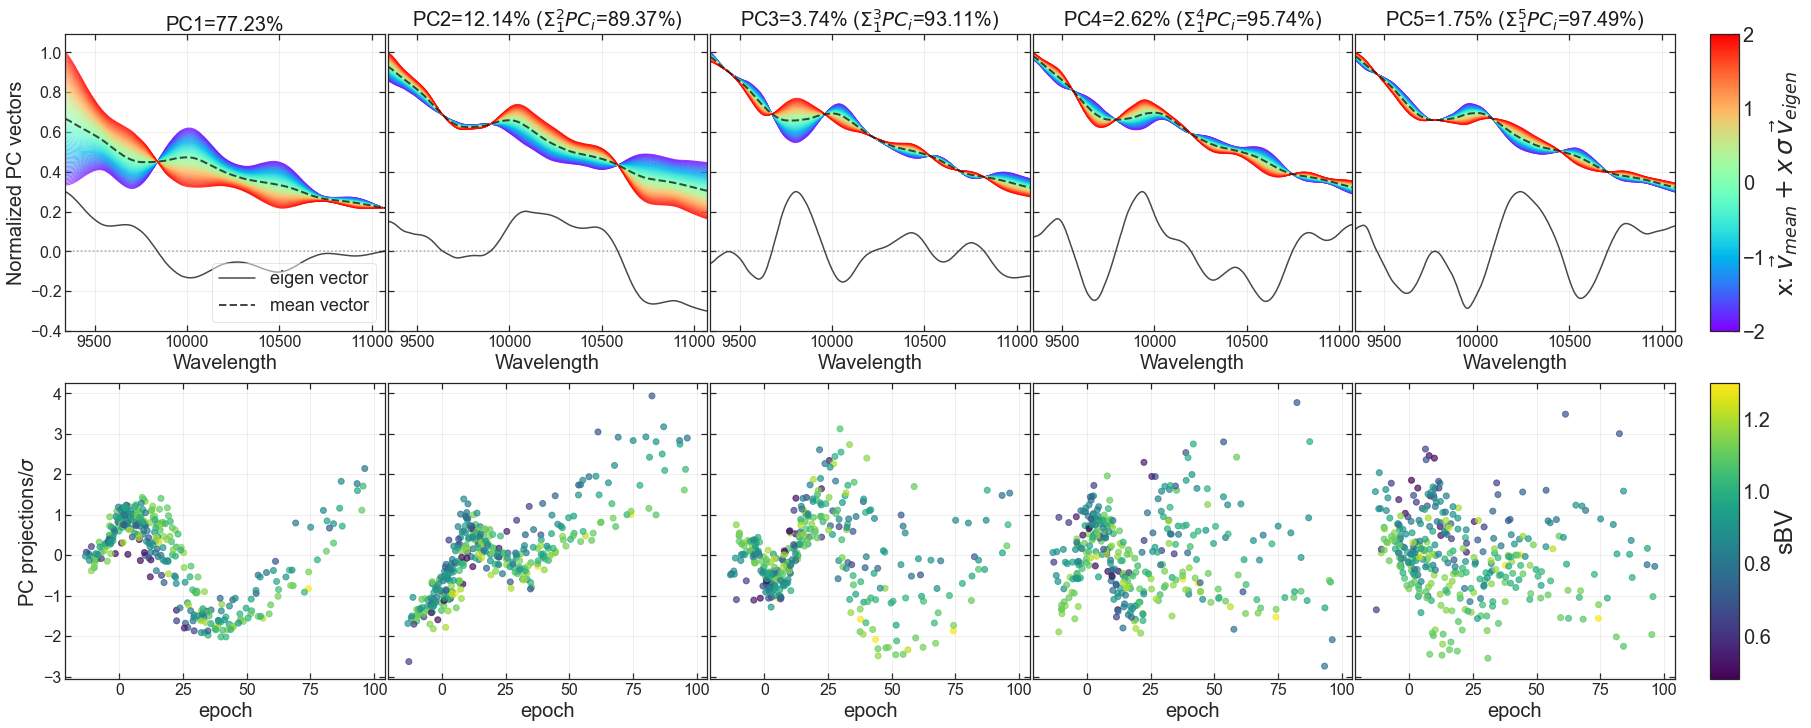

In [6]:
fig = BYOST.visualize.plot_PCA(df_buildingblock,df_conditions,n_components=5,PC_vector_sigma=2)

-----------------------------------------------------------------------------------------------------------
## GPR results

``` python
BYOST.visualize.plot_GPR(df_buildingblock,df_conditions,Wave_bin_ID=0,PC='PC1',view_angle = [32,300])
```

**Inputs**:
- `df_buildingblock`: pandas dataframe contains resulting PCA and GPR
- `df_conditions`: pandas dataframe of the conditions corresponding to df_spectra, e.g., epochs and sBVs
- `Wave_bin_ID`: default 0, the row index of the df_buildingblock
- `PC`: default 'PC1'
- `view_angle`: default [32,300],the viewing angle of the 3D plot 

**Output**:
    Fig of GPR results, a 3D illustration of the GP fits and the 2D projections on the back

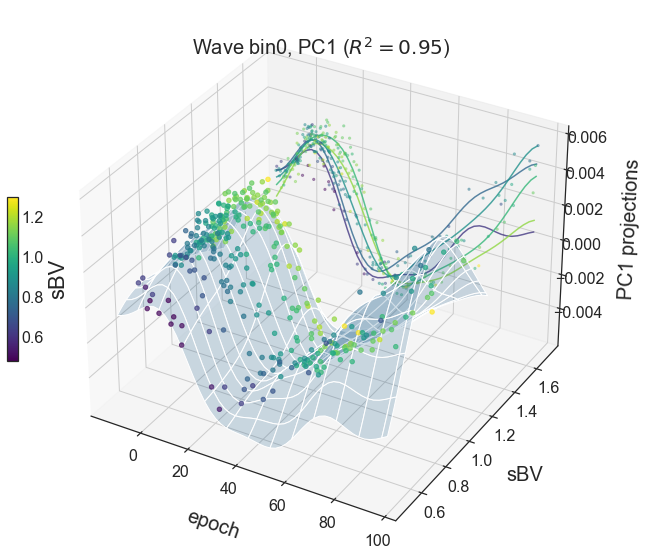

In [7]:
fig = BYOST.visualize.plot_GPR(df_buildingblock,df_conditions,PC='PC1')

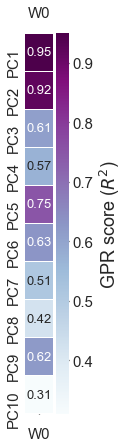

In [8]:
## plot GPR scores (R^2)

fig = BYOST.visualize.plot_GPR_score(df_buildingblock)

-----------------------------------------------------------------------------------------------------------
## Template

``` python
BYOST.visualize.plot_template(df_buildingblock,df_conditions,
                              matching_wave_position=None,y_offset_gap=1.0,
                              condition1_sample=None,condition2_sample=None,
                              condition1_colormap = 'rainbow',condition2_colormap = 'viridis',
                              log_x=True, log_y=True)
```
**Input**:
- `df_buildingblock`: pandas dataframe contains resulting PCA and GPR
- `df_conditions`: pandas dataframe of the conditions corresponding to df_spectra, e.g., epochs and sBVs

- `matching_wave_position`: default will match the flux at the median wavelength postion
- `y_offset_gap`: the offset in yaxis between the sampling template, default 1.0
- `condition1_sample`: default will sample the mean-std, mean, mean+std of the condition1 values while varying condition2
- `condition2_sample`: default will sample the mean-std, mean, mean+std of the condition2 values while varying condition1
- `condition1_colormap`: the color secheme for varying condition1, default rainbow
- `condition2_colormap`: the color secheme for varying condition1, default viridis
- `log_x`: default True, wavelength is plotted in log scale
- `log_y`: default True, flux is plotted in log scale

**Output**:
- Fig of template variation, with 2 panels:
    - left panel:  variation within condition1 while keeping condition2 fixed at certain values
    - right panel: variation within condition2 while keeping condition1 fixed at certain values   

sampling condition1:   0%|          | 0/3 [00:00<?, ?it/s]

sampling condition2:   0%|          | 0/3 [00:00<?, ?it/s]

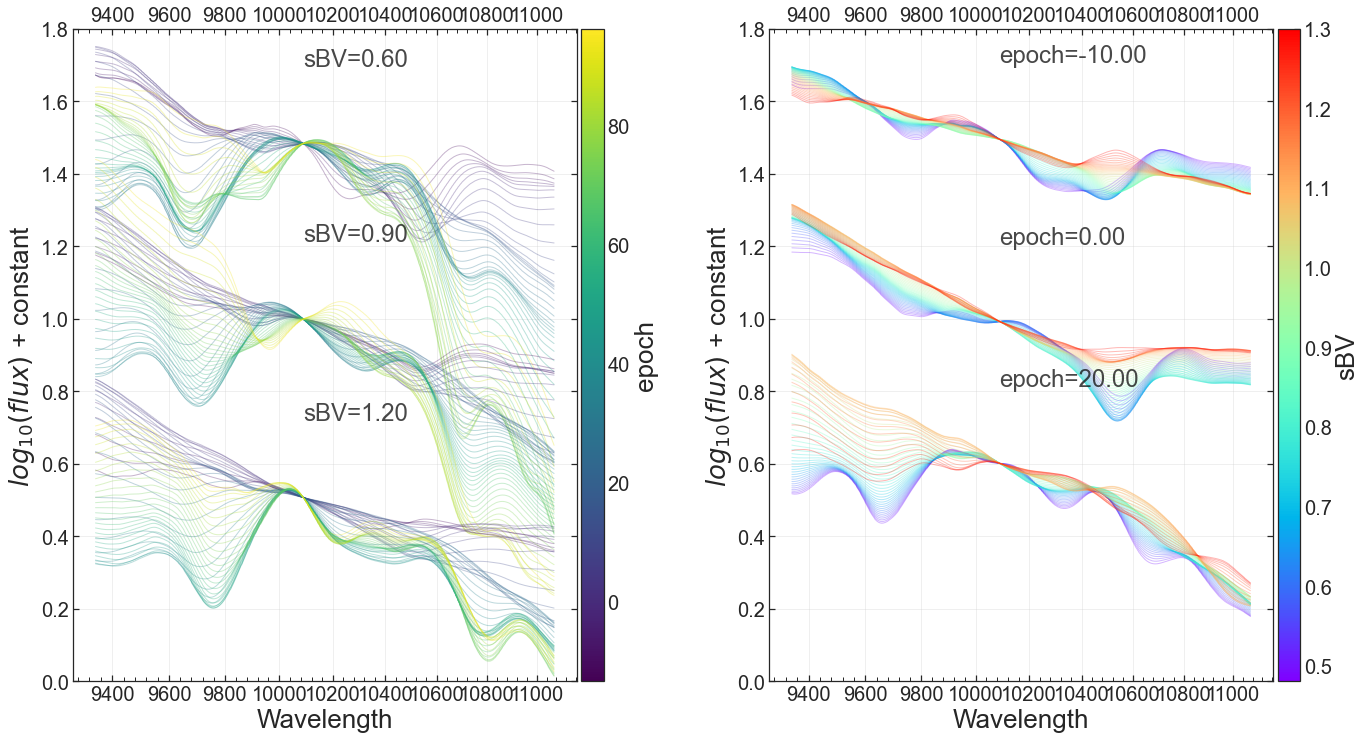

In [9]:
fig = BYOST.visualize.plot_template(df_buildingblock,df_conditions,
                                    y_offset_gap = 0.5,
                                    condition1_sample=[-10,0,20],condition2_sample=[0.6,0.9,1.2],
                                    condition1_colormap = 'viridis',condition2_colormap = 'rainbow')

-----------------------------------------------------------------------------------------------------------
## Template compare with sample

``` python
BYOST.visualize.comp_template_with_sample(df_buildingblock,df_sample_with_conditions,\
                              label_cols = ['cond1','cond2'],legend_label='sample',\
                              co_comp_Hsiao_temp = False,\
                              log_x=True,log_y=True,fig_ax=None,\
                              plot_gap = 0.7, ymax_shift = 0):
```
**Input**:
- `df_buildingblock`: pandas dataframe contains resulting PCA and GPR
- `df_sample_with_conditions`: pandas dataframe contains ['wave','flux','cond1','cond2'] in columns
- `label_cols`: default ['cond1','cond2'], the lables shows at the end of the each spectrum
- `legend_label`: default 'sample'
- `co_comp_Hsiao_temp`: if True, compare with the Hsiao template (SNe Ia) as well (Hsiao et al., 2007, 2009)
- `log_x`: default True, wavelength is plotted in log scale
- `log_y`: default True, flux is plotted in log scale
- `fig_ax`: if None, a new fig and ax will be created, if not None, then input [fig,ax]
- `plot_gap`: the yaxis-gap between each spectrum, default 0.5
- `ymax_shift`: the overall yaxis-shift, default 0
`
**Output**:
- fig of template comparison with given sample

Please make sure cond1 is epoch, cond2 is sBV if comparing with Hsiao template!


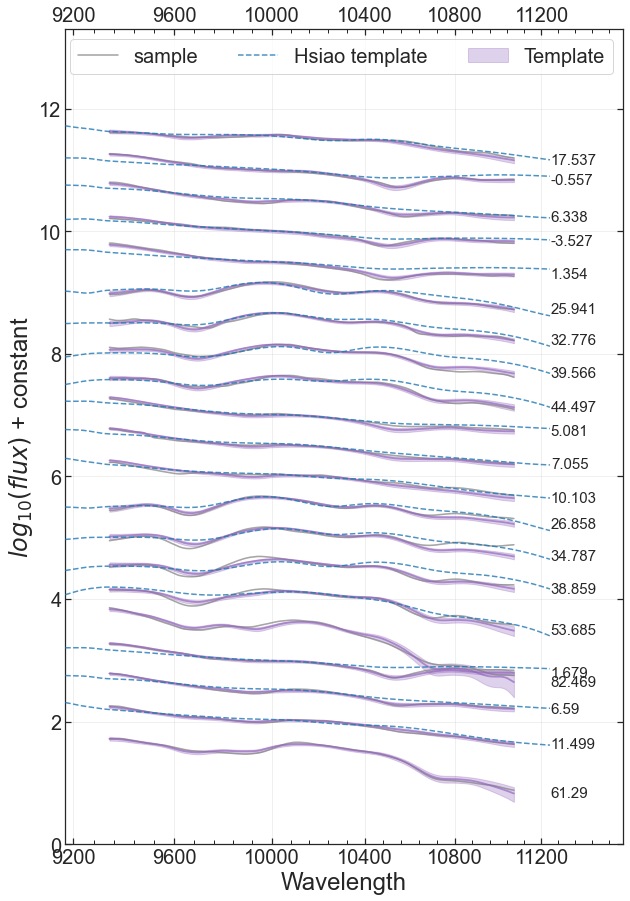

In [10]:
## the following example is comparing the sample spectra with the template built with it, 
## you can also input some other comparison sample

# make the data into the right format
df_sample = pd.DataFrame({'wave':[df_data.columns.values for i in range(df_data.shape[0])],
                          'flux':list(df_data.values)})
df_conditions_rename = df_conditions.rename(columns={'epoch':'cond1','sBV':'cond2'}).round(3)
df_sample_with_conditions = pd.concat([df_sample,df_conditions_rename],axis=1)

# select a subsample based on sBV
sample_sBV = 0.7
df_compare_sample = df_sample_with_conditions.loc[df_sample_with_conditions.cond2.round(1)==sample_sBV]

# plot
fig = BYOST.visualize.comp_template_with_sample(df_buildingblock,df_compare_sample,
                                                label_cols = ['cond1'],
                                                co_comp_Hsiao_temp=True,plot_gap=0.5)
